# Модель для рекомендации тарифа мобильной связи

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Цели-и-задачи" data-toc-modified-id="Цели-и-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цели и задачи</a></span></li><li><span><a href="#Структура-данных" data-toc-modified-id="Структура-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Структура данных</a></span></li></ul></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Адаптивный-бустинг" data-toc-modified-id="Адаптивный-бустинг-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Адаптивный бустинг</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Метод-k-ближайших-соседей" data-toc-modified-id="Метод-k-ближайших-соседей-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Метод k-ближайших соседей</a></span></li><li><span><a href="#Проверка-моделей-на-адекватность" data-toc-modified-id="Проверка-моделей-на-адекватность-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Проверка моделей на адекватность</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Введение

Компания-оператор мобильной связи «Мегалайн» предлагает клиентам два тарифных плана на выбор: **«Смарт»** и **«Ультра»**.

В нашем распоряжении данные о поведении клиентов, которые уже перешли на один из этих тарифов.

### Цели и задачи

**Цель исследования:** 

Построить модель машинного обучения, которая выберет подходящий для пользователя тариф.

**Задачи:**

1. Изучить данные;
2. Исследовать качество различных моделей с разными гиперпараметрами;
3. Проверить модели на адекватность;
4. Построить модель с максимально большим значением *accuracy* (не менее 0.75). 

### Структура данных

Каждая строка содержит информацию о поведении одного пользователя за месяц.

Столбцы:

- **`сalls`** — количество звонков;
- **`minutes`** — суммарная длительность звонков в минутах;
- **`messages`** — количество отправленных sms-сообщений;
- **`mb_used`** — суммарный интернет-трафик в Мб;
- **`is_ultra`** — тариф («Ультра» — 1, «Смарт» — 0).

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

Выведем на экран основную информацию о датафрэйме:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Выведем первые строки таблицы:

In [4]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Выведем также основные статистические параметры таблицы:

In [5]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Видим, что для лучшей интерпретируемости линейной модели данные нуждаются в масштабировании.

Для наглядности построим общую гистограмму:

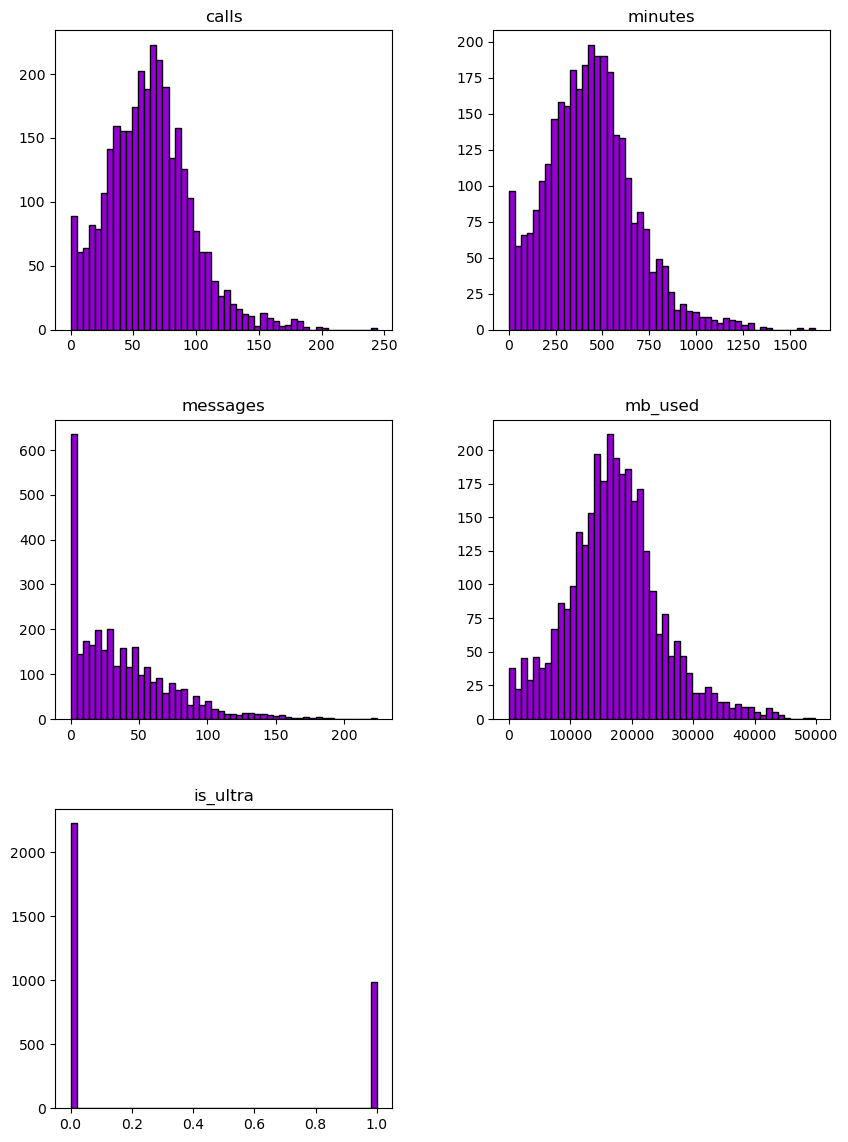

In [6]:
data.hist(figsize=(10,14), bins=50, grid=False, color='darkviolet', ec='black')
plt.show()

Состав значений в столбце *'is_ultra'*:

In [7]:
data['is_ultra'].value_counts().to_frame()

,is_ultra
0,2229
1,985


Видим, что количество пользователей тарифа «Смарт» значительно больше, чем пользователей тарифа «Ультра».

Проверим данные на наличие пропусков:

In [8]:
pd.DataFrame(data.isna().sum(), columns=['NaN'])

,NaN
calls,0
minutes,0
messages,0
mb_used,0
is_ultra,0


Пропусков в данных не обнаружено. Проверим также на наличие дубликатов:

In [9]:
print(f'Количество дубликатов: {data.duplicated().sum()}')

Количество дубликатов: 0


Теперь рассмотрим корреляции признаков:

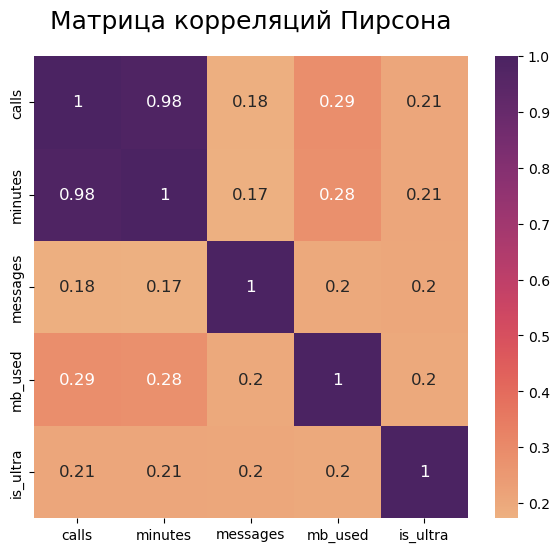

In [10]:
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(), annot=True, cmap='flare', annot_kws={'size':12})
plt.title('Матрица корреляций Пирсона', fontsize=18, pad=20)
plt.show()

**Выводы**:

Мы провели общий обзор данных и выяснили, что:

- Количество строк в базе данных — 3214;
- Количество пользователей тарифа «Смарт» значительно больше, чем пользователей тарифа «Ультра». Хорошо бы учесть это при разделении данных на выборки;
- Дубликатов и пропусков в данных нет;
- Присутствует мультиколлинеарность: сильная корреляция между признаками *calls* и *minutes*;
- Для лучшей интерпретируемости линейной модели данные нуждаются в масштабировании.

## Разделение данных на выборки

Разобьем данные на три выборки: обучающую, валидационную и тестовую в соотношении 3-1-1:

In [11]:
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']

In [12]:
# Делаем валидационную выборку со стратификацией по целевому признаку
# т.к. количество пользователей тарифов сильно отличается
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.2, random_state=12345, stratify=target) 

In [13]:
# Повторяем для тестовой выборки, но с test_size=0.25, т.к. 0.25*(1-0.2)=0.2
features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345, stratify=target_train)

Посмотрим на размеры получившихся выборок:

In [14]:
print(f'Размеры обучающей выборки: признаки: {features_train.shape}, целевой признак: {target_train.shape}')
print(f'Размеры валидационной выборки: признаки: {features_valid.shape}, целевой признак: {target_valid.shape}')
print(f'Размеры тестовой выборки: признаки: {features_test.shape}, целевой признак: {target_test.shape}')

Размеры обучающей выборки: признаки: (1928, 4), целевой признак: (1928,)
Размеры валидационной выборки: признаки: (643, 4), целевой признак: (643,)
Размеры тестовой выборки: признаки: (643, 4), целевой признак: (643,)


Видим, что все корректно.

Попробуем устранить мультиколлинеарность для построения линейной модели. Сохраним 2 сокращенных набора признаков:

In [15]:
features_cut_1_train = features_train.drop('calls', axis=1)
features_cut_1_valid = features_valid.drop('calls', axis=1)
features_cut_1_test = features_test.drop('calls', axis=1)

features_cut_2_train = features_train.drop('minutes', axis=1)
features_cut_2_valid = features_valid.drop('minutes', axis=1)
features_cut_2_test = features_test.drop('minutes', axis=1)

Также для лучшей интерпретируемости линейной модели стандартизируем признаки (в том числе сокращенные наборы) с помощью **StandardScaler**:

In [16]:
scaler = StandardScaler()

In [17]:
features_train_st = scaler.fit_transform(features_train)
features_valid_st = scaler.transform(features_valid)
features_test_st = scaler.transform(features_test)

features_cut_1_train_st = scaler.fit_transform(features_cut_1_train)
features_cut_1_valid_st = scaler.transform(features_cut_1_valid)
features_cut_1_test_st = scaler.transform(features_cut_1_test)

features_cut_2_train_st = scaler.fit_transform(features_cut_2_train)
features_cut_2_valid_st = scaler.transform(features_cut_2_valid)
features_cut_2_test_st = scaler.transform(features_cut_2_test)

**Выводы:**

В этой части исследования мы разделили данные на **признаки** и **целевые признаки** для обучения моделей и разбили их на три стратифицированных выборки: обучающую, валидационную и тестовую в соотношении 3-1-1.

Также мы попробовали устранить мультиколлинеарность для линейной модели с помощью удаления одного или другого столбца из двух сильно коррелирующих между собой столбцов и сохранили оба сокращенных набора признаков для обучающей, валидационной и тестовой выборок в отдельных датафрэймах.

Затем мы стандартизировали признаки для лучшей интерпретируемости линейной модели (в том числе сокращенные наборы) с помощью **StandardScaler**, также сохранили их в отдельные датафрэймы.

## Исследование моделей

У нас стоит задача по классификации, поскольку нужно разделить пользователей на 2 категории тарифов.

Мы будем исследовать 6 моделей-классификаторов:

- **Дерево решений**;
- **Случайный лес**;
- **Логистическая регрессия**;
- **Адаптивный бустинг**;
- **Градиентный бустинг**;
- **Метод k-ближайших соседей**.

Также мы подберем лучшие гиперпараметры для данных моделей на валидационной выборке. В качестве метрики оценки качества будем использовать **accuracy** *(доля правильных ответов — показатель, который описывает общую точность предсказания модели по всем классам)*.

### Дерево решений

**Дерево решений** — универсальный алгоритм машинного обучения. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая переменная, а в «листьях» записаны значения целевой переменной. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

In [18]:
best_tree_model = None
best_depth = 0
best_result = 0

# Таблица для сравнения точности при изменении макс. доп. глубины
gparms_tree = pd.DataFrame({'max_depth':[], 'accuracy_train':[], 'accuracy_valid':[]})

for depth in tqdm(range(1, 16)):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_train = model.predict(features_train)
    predictions_valid = model.predict(features_valid)
    result_train = accuracy_score(target_train, predictions_train)
    result = accuracy_score(target_valid, predictions_valid)
    gparms_tree.loc[len(gparms_tree.index)] = [depth, result_train.round(3), result.round(3)]
    if result > best_result:
        best_depth = depth
        best_result = result
        best_tree_model = model

print('Лучшая максимально допустимая глубина дерева:', best_depth)
print('Accuracy лучшей модели на валидационной выборке:', '{:.3f}'.format(best_result))

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 42.74it/s]

Лучшая максимально допустимая глубина дерева: 3
Accuracy лучшей модели на валидационной выборке: 0.799


Выведем на экран таблицу со значениями accuracy для каждого значения максимально допустимой глубины дерева и оформим в график:

In [19]:
gparms_tree

,max_depth,accuracy_train,accuracy_valid
0,1.0,0.752,0.748
1,2.0,0.782,0.785
2,3.0,0.794,0.799
3,4.0,0.798,0.784
4,5.0,0.820,0.796
5,6.0,0.835,0.798
6,7.0,0.846,0.782
7,8.0,0.858,0.779
8,9.0,0.874,0.782
9,10.0,0.884,0.782


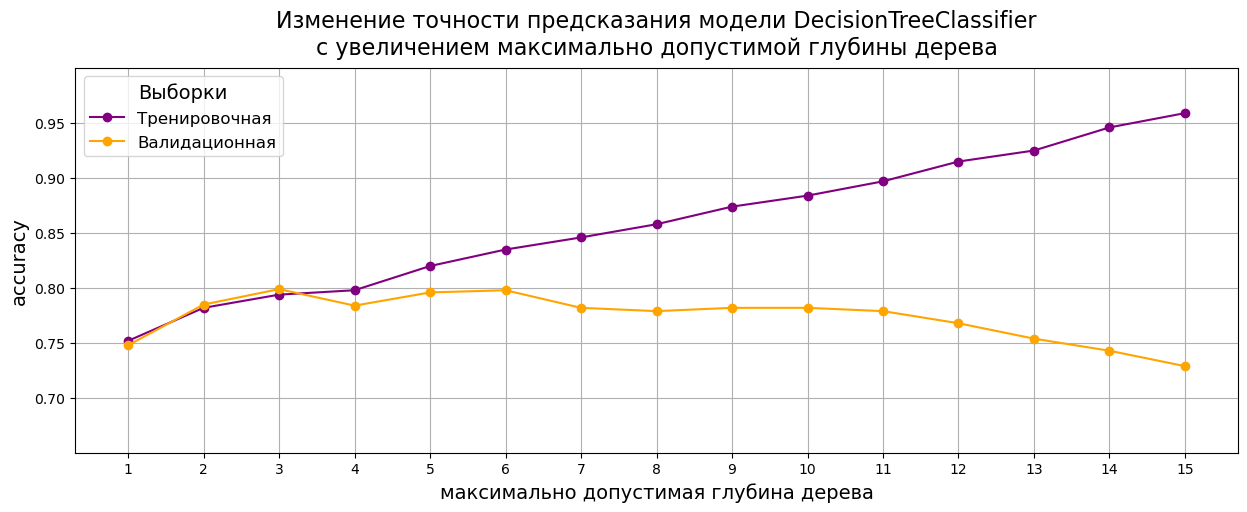

In [20]:
gparms_tree.plot(x='max_depth', style='o-', color=['purple', 'orange'], grid=True, figsize=(15,5), legend=False)
plt.title('Изменение точности предсказания модели DecisionTreeClassifier\nс увеличением максимально допустимой глубины дерева',
         fontsize=16, pad=10)
plt.ylim(0.65,1)
plt.xticks(ticks=range(1,16,1), fontsize=10)
plt.xlabel('максимально допустимая глубина дерева', fontsize=14)
plt.yticks(ticks=np.arange(0.7,0.96,0.05), fontsize=10)
plt.ylabel('accuracy', fontsize=14)
plt.legend(['Тренировочная', 'Валидационная'], title='Выборки', fontsize=12, title_fontsize=14)
plt.show()

Видим, что если максимально допустимая глубина дерева больше 6, у модели дерева решений наступает переобучение. А лучший результат *accuracy* на валидационной выборке, как и вывел нам код выше, получается при максимально допустимой глубине дерева 3.

Построим также *plot_tree* с максимально допустимой глубиной дерева 3, чтобы увидеть, как модель принимает решение:

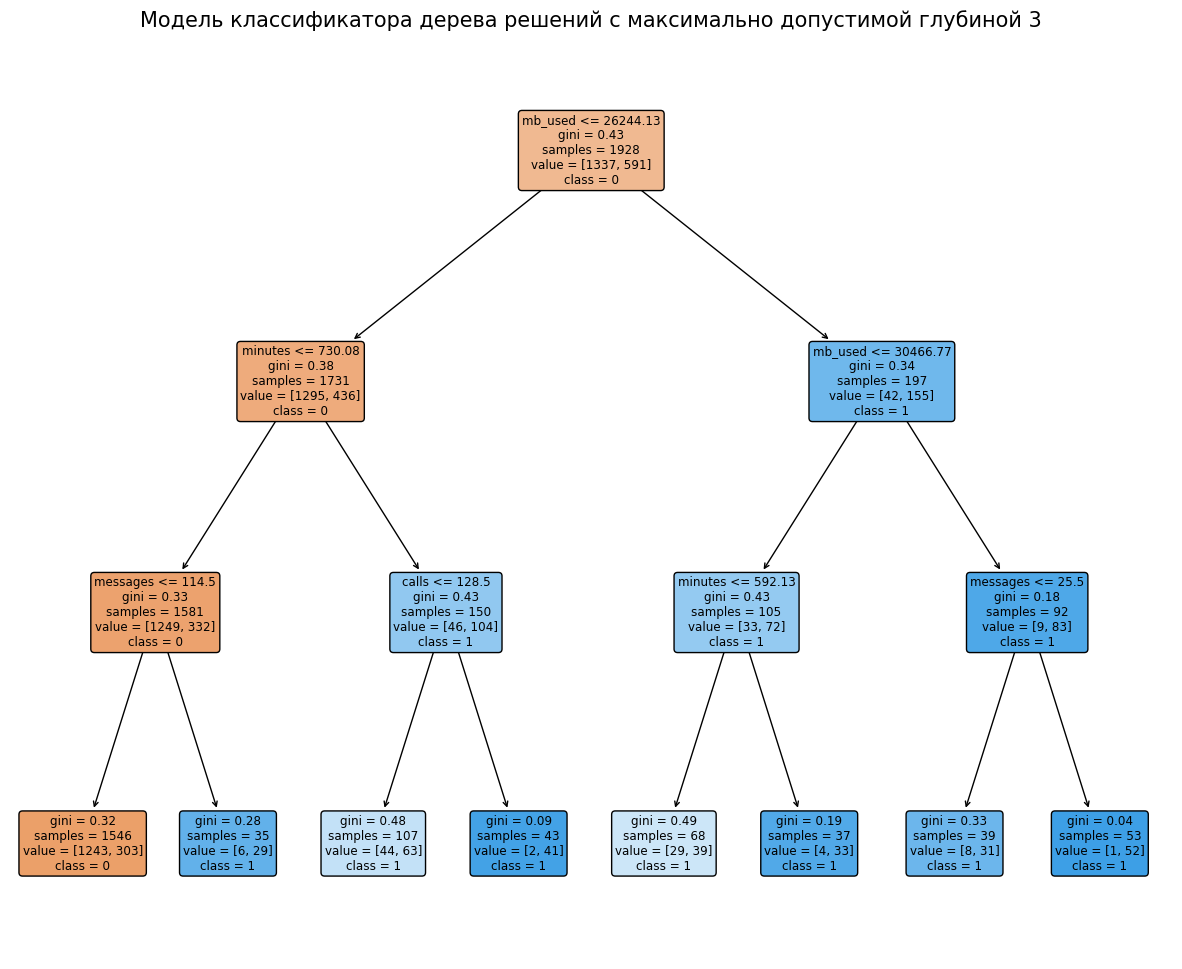

In [21]:
plt.figure(figsize=(15,12))
tree.plot_tree(best_tree_model, feature_names=features_train.columns,
               class_names=['0','1'], filled=True, rounded=True, precision=2)
plt.title('Модель классификатора дерева решений с максимально допустимой глубиной 3', fontsize=15)
plt.show()

### Случайный лес

**Случайный лес** —  алгоритм машинного обучения, использующий большой ансамбль независимых друг от друга решающих деревьев и принимающий решение на основе голосования.

In [22]:
best_forest_model = None
best_estimators = 0
best_depth = 0
best_result = 0

for est in tqdm(range(20, 101, 5)):
    for depth in range (2, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_estimators = est
            best_depth = depth
            best_result = result
            best_forest_model = model
            
print('Лучшее количество деревьев:', best_estimators)
print('Лучшая максимально допустимая глубина дерева:', best_depth)
print('Accuracy лучшей модели на валидационной выборке:', '{:.3f}'.format(best_result))

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [01:43<00:00,  6.11s/it]

Лучшее количество деревьев: 55
Лучшая максимально допустимая глубина дерева: 11
Accuracy лучшей модели на валидационной выборке: 0.827


### Адаптивный бустинг

**Адаптивный бустинг** — алгоритм машинного обучения, который создает решающую модель прогнозирования в виде ансамбля слабых моделей прогнозирования, обычно деревьев решений. Является адаптивным в том смысле, что последующие слабые модели настраиваются в пользу тех экземпляров, которые были неправильно классифицированы предыдущими классификаторами. Затем слабые модели объединяются во взвешенную сумму, которая представляет окончательный результат усиленного классификатора.

In [23]:
best_adaboost_model = None
best_estimators = 0
best_depth = 0
best_result = 0

for est in tqdm(range(20, 101, 5)):
    for depth in range(2, 16):
        base = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
        model = AdaBoostClassifier(random_state=12345, base_estimator=base, n_estimators=est)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_estimators = est
            best_depth = depth
            best_result = result
            best_adaboost_model = model
            
print('Лучшее количество деревьев:', best_estimators)
print('Лучшая максимально допустимая глубина базового дерева:', best_depth)
print('Accuracy лучшей модели на валидационной выборке:', '{:.3f}'.format(best_result))

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [03:35<00:00, 12.69s/it]

Лучшее количество деревьев: 80
Лучшая максимально допустимая глубина базового дерева: 11
Accuracy лучшей модели на валидационной выборке: 0.802


### Градиентный бустинг

**Градиентный бустинг** — еще один алгоритм машинного обучения, который создает решающую модель прогнозирования в виде ансамбля слабых моделей прогнозирования, обычно также деревьев решений. При каждом следующем шаге новая модель обучается с использованием данных об ошибках предыдущих. Результирующая функция представляет собой линейную комбинацию базовых, слабых моделей.

Разница между градиентным и адаптивным бустингом заключается в том, как алгоритмы идентифицируют слабые модели. Адаптивный бустинг выявляет их на основании высоких значений весов, а градиентный бустинг – на основании градиентов функции потерь.

In [24]:
best_gradboost_model = None
best_estimators = 0
best_depth = 0
best_result = 0

for est in tqdm(range(20, 101, 5)):
    for depth in range(2, 16):
        model = GradientBoostingClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_estimators = est
            best_depth = depth
            best_result = result
            best_gradboost_model = model
            
print('Лучшее количество деревьев:', best_estimators)
print('Лучшая максимально допустимая глубина дерева:', best_depth)
print('Accuracy лучшей модели на валидационной выборке:', '{:.3f}'.format(best_result))

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [07:25<00:00, 26.19s/it]

Лучшее количество деревьев: 25
Лучшая максимально допустимая глубина дерева: 4
Accuracy лучшей модели на валидационной выборке: 0.816


### Логистическая регрессия

**Логистическая регрессия** — алгоритм машинного обучения, используемый для прогнозирования вероятности целевой переменной. Природа целевой переменной дихотомична. т.е. существует только два возможных класса. Логистическая регрессия вычисляет, к какому классу близок объект, и в зависимости от ответа выбирает нужный класс.

Для лучшей интерпретируемости линейной модели будем использовать стандартизированный набор признаков:

In [25]:
def log_reg(f_t, f_v):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
    model.fit(f_t, target_train)
    result = model.score(f_v, target_valid)
    print('Accuracy модели логистической регрессии на валидационной выборке:', '{:.3f}'.format(result))

In [26]:
log_reg(features_train, features_valid)

Accuracy модели логистической регрессии на валидационной выборке: 0.737


На невысокие результаты линейной модели могла повлиять обнаруженная нами выше мультиколлинеарность. Попробуем устранить ее и заново обучить модель:

In [27]:
log_reg(features_cut_1_train_st, features_cut_1_valid_st)

Accuracy модели логистической регрессии на валидационной выборке: 0.737


In [28]:
log_reg(features_cut_2_train_st, features_cut_2_valid_st)

Accuracy модели логистической регрессии на валидационной выборке: 0.743


При обучении модели на втором сокращенном наборе признаков результаты стали немного лучше, но все равно не дотягивают до результатов других моделей.

### Метод k-ближайших соседей

**Метод k-ближайших соседей** — алгоритм машинного обучения, присваивающий объекту значение целевого признака, известного для *k* ближайших к нему объектов в обучающем наборе данных. 

In [29]:
def kn(f_t, f_v):
    best_model = None
    best_neighbors = 0
    best_result = 0

    for k in tqdm(range(50, 301, 50)):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(f_t, target_train)
        result = model.score(f_v, target_valid)
        if result > best_result:
            best_neighbors = k
            best_result = result
            best_model = model
            
    print('Лучшее количество соседей:', best_neighbors)
    print('Accuracy лучшей модели на валидационной выборке:', '{:.3f}'.format(best_result))
    return best_model

In [30]:
best_kn_model = kn(features_train, features_valid)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.89it/s]

Лучшее количество соседей: 250
Accuracy лучшей модели на валидационной выборке: 0.747


Модель показала невысокие результаты, хотя и немного лучше, чем логистическая регрессия. 

Проверим ее на чувствительность к стандартизации признаков:

In [31]:
best_kn_model_st = kn(features_train_st, features_valid_st)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.72it/s]

Лучшее количество соседей: 50
Accuracy лучшей модели на валидационной выборке: 0.785


При обучении модели на стандартизированных признаках модель работает немного лучше.

### Проверка моделей на адекватность

Проверим наши модели на адекватность с помощью другой модели библиотеки **sklearn — DummyClassifier**.

Эта модель делает прогнозы, которые игнорируют значения входных признаков, и служит простой базой для сравнения с другими более сложными классификаторами.

Конкретное поведение модели выбирается с помощью параметра *strategy*. Используем стратегию *most_frequent*. Эта стратегия всегда возвращает один и тот же класс — наиболее часто встречающийся у целевого признака обучающей выборки. В нашем случае это «0», соответствующий тарифу «Смарт».

In [32]:
model = DummyClassifier(strategy='most_frequent').fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
predictions_test = model.predict(features_test)
result1 = accuracy_score(target_valid, predictions_valid)
result2 = accuracy_score(target_test, predictions_test)

print('Accuracy стратегии most_frequent модели DummyClassifier на валидационной выборке:', '{:.3f}'.format(result1))
print('Accuracy стратегии most_frequent модели DummyClassifier на тестовой выборке:', '{:.3f}'.format(result2))

Accuracy стратегии most_frequent модели DummyClassifier на валидационной выборке: 0.694
Accuracy стратегии most_frequent модели DummyClassifier на тестовой выборке: 0.694


Точность правильных ответов в такой модели предсказания на валидационной и тестовой выборках — 0.694. Таким образом, чтобы считать наши модели адекватными, они должны демонстрировать *accuracy выше 0.694*. Все наши модели демонстрируют более высокие значения *accuracy*, значит, они адекватны.

### Выводы

Мы исследовали 6 моделей-классификаторов:

- **Дерево решений**;
- **Случайный лес**;
- **Логистическая регрессия**;
- **Адаптивный бустинг**;
- **Градиентный бустинг**;
- **Метод k-ближайших соседей**.

Мы подобрали лучшие гиперпараметры для данных моделей на валидационной выборке. В качестве метрики оценки качества использовали **accuracy**.

Также мы проверили наши модели на адекватность с помощью **DummyClassifier** (стратегия *most_frequent*). Установили порог адекватности моделей, равный **0.694**. У настоящих классификационных моделей *accuracy* должна быть выше этого значения.

Все наши модели демонстрируют более высокие значения *accuracy*, значит, они адекватны.

Среди изученных нами моделей лучшую точность предсказания на валидационной выборке показала модель **RandomForestClassifier** при максимально допустимой глубине дерева 11 и количестве деревьев 55 **(accuracy 0.827)**. Ее и будем проверять на тестовой выборке.

## Тестирование модели

Возьмем для тестирования лучшую модель — модель случайного леса с лучшими гиперпараметрами *'max_depth': 11, 'n_estimators': 55*.

Применим еще один трюк: заново обучим нашу модель на увеличенной выборке, состоящей из объединенных обучающей и валидационной выборок:

In [33]:
features_train_plus = pd.concat([features_train, features_valid])
target_train_plus = pd.concat([target_train, target_valid])

In [34]:
print(
    f'Размеры расширенной обучающей выборки: признаки: {features_train_plus.shape}, целевой признак: {target_train_plus.shape}')

Размеры расширенной обучающей выборки: признаки: (2571, 4), целевой признак: (2571,)


In [35]:
model = best_forest_model
model.fit(features_train_plus, target_train_plus)
result = model.score(features_test, target_test)
print("Accuracy лучшей модели RandomForest на тестовой выборке:", '{:.3f}'.format(result))

Accuracy лучшей модели RandomForest на тестовой выборке: 0.824


Таким образом на лучшей из исследованных нами моделей — **RandomForestClassifier** — с лучшим сочетанием гиперпараметров на тестовой выборке мы достигли **accuracy 0.824**.

## Итоги исследования

**Целью нашего исследования было построить модель машинного обучения, которая выберет подходящий для пользователя тариф**.

**В первой части** исследования мы провели общий обзор данных и выяснили, что:

- Количество строк в базе данных  — 3214;
- Каждая строка содержит информацию о поведении одного пользователя за месяц;
- Количество пользователей тарифа «Смарт» значительно больше, чем пользователей тарифа «Ультра»;
- Дубликатов и пропусков в данных нет;
- Присутствует мультиколлинеарность: сильная корреляция между признаками *calls* и *minutes*;
- Для лучшей интерпретируемости линейной модели данные нуждаются в масштабировании.

**Во второй части** мы разделили данные на **признаки** и **целевые признаки** для обучения моделей и разбили их на три стратифицированных выборки: обучающую, валидационную и тестовую в соотношении 3-1-1.

Также мы попробовали устранить мультиколлинеарность для линейной модели с помощью удаления одного или другого столбца из двух сильно коррелирующих между собой столбцов и сохранили оба сокращенных набора признаков для обучающей, валидационной и тестовой выборок в отдельных датафрэймах.

Затем мы стандартизировали признаки для лучшей интерпретируемости линейной модели (в том числе сокращенные наборы) с помощью **StandardScaler**, также сохранили их в отдельные датафрэймы.

**В третьей части** мы исследовали 6 моделей-классификаторов:

- **Дерево решений**;
- **Случайный лес**;
- **Логистическая регрессия**;
- **Адаптивный бустинг**;
- **Градиентный бустинг**;
- **Метод k-ближайших соседей**.

Также мы подобрали лучшие гиперпараметры для данных моделей на валидационной выборке. В качестве метрики оценки качества использовали **accuracy**.

Лучшую точность предсказания на валидационной выборке показала модель **RandomForestClassifier** при максимально допустимой глубине дерева 11 и количестве деревьев 55 **(accuracy 0.827)**.

**В четвертой части** исследования мы проверили наши модели на адекватность с помощью **DummyClassifier**. Пришли к выводу, то наши модели адекватны.

**В заключительной части** исследования мы проверили нашу лучшую модель **RandomForestClassifier** с лучшими гиперпараметрами с лучшими гиперпараметрами *'max_depth': 11, 'n_estimators': 55* на тестовой выборке и достигли **accuracy 0.824**.

**Таким образом для рекомендации наиболее подходящего для пользователя тарифа мы предлагаем использовать модель случайного леса с указанными выше гиперпараметрами**.